In [1]:
import numpy as np
import pandas as pd

**1**) Мороженное любят 80%. Из 100 опрошенных мороженное любят 75. Какая вероятность, что при опросе мы получим 75 и меньше?

In [2]:
np.random.binomial(1, 0.5)

0

In [3]:
sum([np.random.binomial(1, 0.5) for i in range(100)])

53

In [4]:
np.random.binomial(1, 0.8, size=100)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [5]:
np.random.binomial(1, 0.8, size=100).mean()

0.83

In [6]:
np.random.binomial(1, 0.8, size=100).mean() <= 0.75

False

In [7]:
[np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for i in range(10)]

[False, True, False, False, False, False, False, False, False, False]

In [8]:
np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for i in range(10000)])

0.129

P-value: 0.1247

0.1247 > 0.05

Значит мы не можем отвергнуть гипотезу про 80%

In [9]:
from statsmodels.stats.proportion import proportions_ztest as ztest
ztest(75, 100, value=0.8, alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

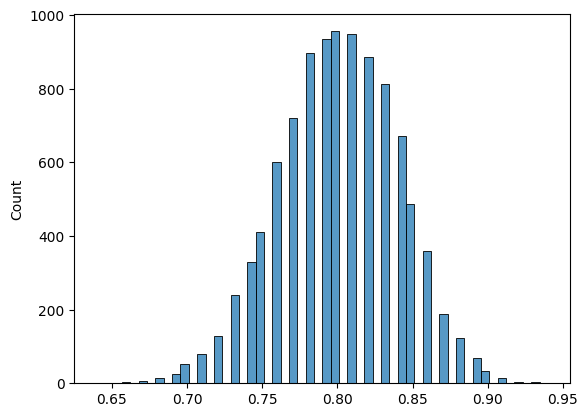

In [10]:
import seaborn as sns
sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for i in range(10000)]);

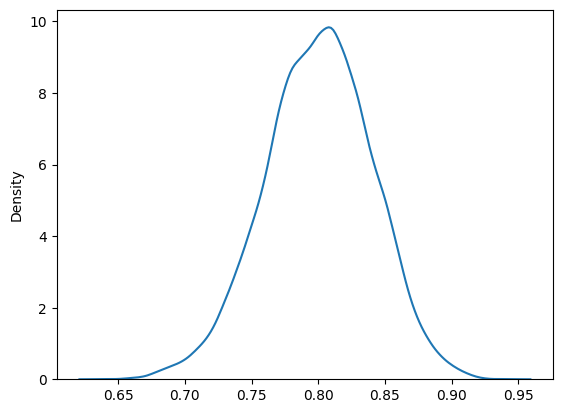

In [11]:
sns.kdeplot([np.random.binomial(1, 0.8, size=100).mean() for i in range(10000)]);

**2**) Есть Landing Page A и B. Новый дизайн показали 30% пользователей из 1000.

In [12]:
df = pd.DataFrame({'page': ['A','B'], 'lead': [700, 300], 'sale':[70, 48]})
df['cr'] = df['sale'] / df['lead'] # Conversion Rate
df

,page,lead,sale,cr
0,A,700,70,0.10
1,B,300,48,0.16


Какова вероятность, что результат случайный?

In [13]:
(70 + 48) / 1000

0.118

In [14]:
np.random.binomial(1, 0.118, size=700).mean()

0.14

In [15]:
np.random.binomial(1, 0.118, size=300).mean()

0.13666666666666666

In [16]:
np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean()

-0.013809523809523813

In [17]:
abs(np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean())

0.04523809523809523

In [18]:
abs(0.1 - 0.16)

0.06

In [19]:
abs(np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean()) >= 0.06

False

In [20]:
[abs(np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean()) >= 0.06 for i in range(10)]

[False, False, False, False, False, False, False, False, False, False]

In [21]:
np.mean([abs(np.random.binomial(1, 0.118, size=700).mean() - np.random.binomial(1, 0.118, size=300).mean()) >= 0.06 for i in range(10000)])

0.0067

https://www.evanmiller.org/ab-testing/chi-squared.html

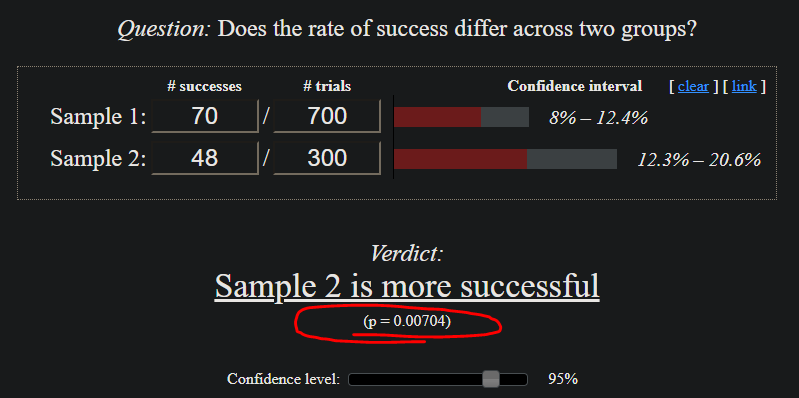

In [22]:
ztest([70, 48], [700, 300])

(-2.695166510284625, 0.007035346384355496)

In [23]:
np.mean([abs(np.random.binomial(1, 0.1, size=700).mean() - np.random.binomial(1, 0.16, size=300).mean()) >= 0.06 for i in range(1000)])

0.502

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7

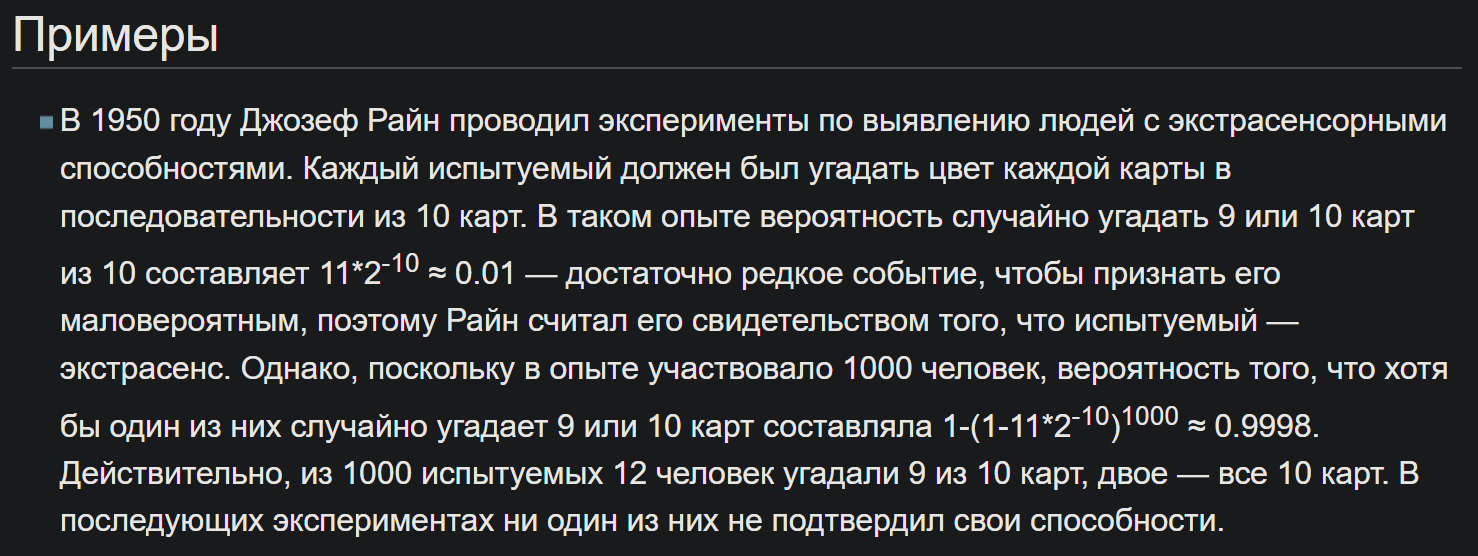

In [40]:
import random

def intersection_list(list1, list2): 
  k = 10
  for i in range(10):
    if list1[i] != list2[i]:
      k -= 1
  if k == 9:
    return True
  return False

 
color = [0, 1]
k = 0
for i in range(1000):
  ist = [random.choice(color) for i in range(10)]
  igr = [random.choice(color) for i in range(10)]
  if intersection_list(ist, igr):
    k += 1
print(k)



11
